In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import community as louvain
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data\PaySim.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
print(df.shape)
df.isnull().sum()

(6362620, 11)


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [6]:
print(f"% fraud count = {fraud_counts[1]/(fraud_counts[0]+fraud_counts[1]) * 100}")

% fraud count = 0.12908204481801522


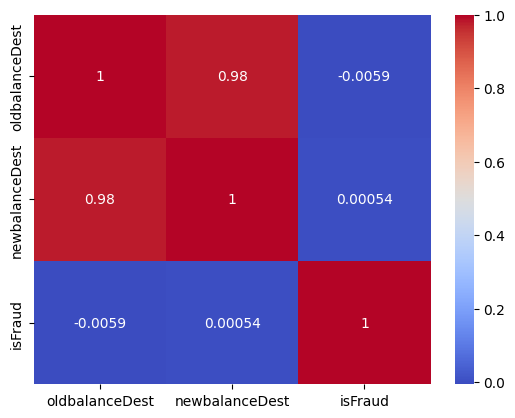

In [7]:
correlation_matrix = df[['oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
processed_df = df.copy()
processed_df['balanceDiffOrig'] = processed_df['newbalanceOrig'] - processed_df['oldbalanceOrg']
processed_df['balanceDiffDest'] = processed_df['newbalanceDest'] - processed_df['oldbalanceDest']
processed_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,-9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,-1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,-181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,-181.00,-21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,-11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,-7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,-7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,-7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,-2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,-5337.77,-1549.21


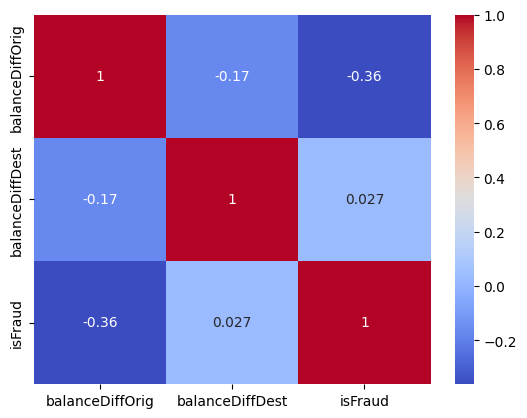

In [9]:
correlation_matrix = processed_df[['balanceDiffOrig', 'balanceDiffDest', 'isFraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
processed_df.drop(columns=['balanceDiffDest', 'oldbalanceDest', 'newbalanceDest'], inplace=True)
processed_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud,balanceDiffOrig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0,0,-9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0,0,-1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,1,0,-181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,1,0,-181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0,0,-11668.14


In [11]:
import os
from dotenv import load_dotenv

load_dotenv()

# Neo4j Connection
NEO4J_URI = os.getenv("NEO4J_URI")
NEO4J_USER = os.getenv("NEO4J_USER")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

In [25]:
from py2neo import Graph, Node, Relationship, NodeMatcher

def connectToNeo4j():
    try:
        graph = Graph(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
        print("Connected to Neo4j database")
        return graph
    except Exception as e:
        print(f"Failed to connect: {e}")
        return None

In [26]:
graph = connectToNeo4j()
print(graph)

Connected to Neo4j database
Graph('bolt://localhost:7687')


In [27]:
# graph = connectToNeo4j()
result = graph.run("SHOW DATABASES").data()
print(result)

[{'name': 'neo4j', 'type': 'standard', 'aliases': [], 'access': 'read-write', 'address': 'localhost:7687', 'role': 'primary', 'writer': True, 'requestedStatus': 'online', 'currentStatus': 'online', 'statusMessage': '', 'default': True, 'home': True, 'constituents': []}, {'name': 'system', 'type': 'system', 'aliases': [], 'access': 'read-write', 'address': 'localhost:7687', 'role': 'primary', 'writer': True, 'requestedStatus': 'online', 'currentStatus': 'online', 'statusMessage': '', 'default': False, 'home': False, 'constituents': []}]


In [28]:
sample_size = 100000

fraud_df = processed_df[processed_df['isFraud'] == 1].copy()
non_fraud_df = processed_df[processed_df['isFraud'] == 0].sample(n=min(sample_size - len(fraud_df), len(processed_df[processed_df['isFraud'] == 0])), random_state=42)
processed_df = pd.concat([fraud_df, non_fraud_df]).reset_index(drop=True)
print(f"Using sample of {len(df)} transactions ({len(fraud_df)} fraudulent)")
processed_df.head()

Using sample of 6362620 transactions (8213 fraudulent)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,isFraud,isFlaggedFraud,balanceDiffOrig
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,1,0,-181.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,1,0,-181.0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,1,0,-2806.0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,1,0,-2806.0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,1,0,-20128.0


In [29]:
processed_df.head()
print(processed_df.shape)

(100000, 10)


In [30]:
import time
from py2neo.bulk import create_nodes, create_relationships
import tqdm

# Clear database
print("Deleting all previous graphs..")
graph.run("MATCH (n) DETACH DELETE n")
print("Deleted all")

# Create Schema constraints
graph.run("CREATE CONSTRAINT client_id IF NOT EXISTS FOR (c:Client) REQUIRE c.id IS UNIQUE")
graph.run("CREATE CONSTRAINT merchant_id IF NOT EXISTS FOR (m:Merchant) REQUIRE m.id IS UNIQUE")

Deleting all previous graphs..
Deleted all


(No data)

In [38]:
# Create client and merchant nodes
originator_entities = set(processed_df['nameOrig'].unique())
destination_entities = set(processed_df['nameDest'].unique())
all_entities = originator_entities.union(destination_entities)
print(len(originator_entities))
print(len(destination_entities))

99999
93132


In [39]:
client_entities = {entity for entity in all_entities if entity.startswith("C")}
merchant_entities = {entity for entity in all_entities if entity.startswith("M")}

In [40]:
client_data = [
    {
        "id": entity,
        "name": entity,
        "is_originator": entity in originator_entities,
        "is_destination": entity in destination_entities
    } for entity in client_entities
]

merchant_data = [
    {
        "id": entity,
        "name": entity,
        "is_originator": entity in originator_entities,
        "is_destination": entity in destination_entities
    } for entity in merchant_entities
]

In [41]:
# Bulk create client nodes
batch_size = 500
for i in range(0, len(client_data), batch_size):
    batch = client_data[i:i+batch_size]
    create_nodes(graph.auto(), batch, labels={"Client"})

# Bulk create merchant nodes
for i in range(0, len(merchant_data), batch_size):
    batch = merchant_data[i:i+batch_size]
    create_nodes(graph.auto(), batch, labels={"Merchant"})

In [42]:
# 2. Create transaction edges directly between entities
print("Creating transaction edges...")

# Process in batches to avoid memory issues
batch_size = 1000
total_batches = (len(df) + batch_size - 1) // batch_size
print(total_batches)

Creating transaction edges...
6363


In [43]:
for batch_idx in tqdm.tqdm(range(total_batches)):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(df))
        batch_df = df.iloc[start_idx:end_idx]
        
        # Use Cypher for batch transaction creation
        tx_data = []
        for idx, row in batch_df.iterrows():
            source_id = row['nameOrig']
            target_id = row['nameDest']
            
            tx_data.append({
                "from_id": source_id,
                "to_id": target_id,
                "from_type": "Client" if source_id.startswith("C") else "Merchant",
                "to_type": "Client" if target_id.startswith("C") else "Merchant",
                "tx_id": int(idx),
                "step": int(row['step']),
                "type": row['type'],
                "amount": float(row['amount']),
                "is_fraud": bool(row['isFraud']),
                "is_flagged_fraud": bool(row['isFlaggedFraud']),
                "orig_old_balance": float(row['oldbalanceOrg']),
                "orig_new_balance": float(row['newbalanceOrig']),
                "balanceDiffOrig": float(row['balanceDiffOrig']) if 'balanceDiffOrig' in row else float(row['newbalanceOrig']) - float(row['oldbalanceOrg'])
                # Removed the dest balance fields that were removed from the dataset
            })
        
        # Process in smaller chunks for the transaction edges
        tx_batch_size = 200
        for i in range(0, len(tx_data), tx_batch_size):
            tx_batch = tx_data[i:i+tx_batch_size]
            
            # Use a parameterized Cypher query for creating edges in batches
            # Modified to handle both Client and Merchant node types and removed the deleted fields
            query = """
            UNWIND $transactions AS tx
            MATCH (from:`${fromType}` {id: tx.from_id})
            MATCH (to:`${toType}` {id: tx.to_id})
            CREATE (from)-[r:TRANSACTION {
                tx_id: tx.tx_id,
                step: tx.step,
                type: tx.type,
                amount: tx.amount,
                is_fraud: tx.is_fraud,
                is_flagged_fraud: tx.is_flagged_fraud,
                orig_old_balance: tx.orig_old_balance,
                orig_new_balance: tx.orig_new_balance,
                orig_balance_diff: tx.balanceDiffOrig,
                timestamp: datetime({epochmillis: tx.step * 3600000})
            }]->(to)
            """
            
            for tx in tx_batch:
                # Execute for each transaction with the correct node types
                graph.run(
                    query.replace("${fromType}", tx["from_type"]).replace("${toType}", tx["to_type"]),
                    parameters={"transactions": [tx]}
                )

100%|██████████| 6363/6363 [10:08:02<00:00,  5.73s/it]      


In [44]:
# Create aggregate relationships (optional but useful)
print("Creating aggregate relationships...")

# This creates TRANSFERS_TO relationships that summarize all transactions between entity pairs
graph.run("""
MATCH (e1)-[t:TRANSACTION]->(e2)
WITH e1, e2, 
        collect(t) as transactions,
        sum(t.amount) as total_amount,
        count(t) as tx_count,
        sum(CASE WHEN t.is_fraud THEN 1 ELSE 0 END) as fraud_count
MERGE (e1)-[r:TRANSFERS_TO]->(e2)
SET r.tx_count = tx_count,
    r.total_amount = total_amount,
    r.fraud_count = fraud_count,
    r.fraud_ratio = toFloat(fraud_count) / tx_count,
    r.avg_amount = total_amount / tx_count
""")

Creating aggregate relationships...


(No data)

In [45]:
# Update entity nodes with aggregate metrics - for both Client and Merchant nodes
print("Calculating entity metrics...")

# Calculate transaction counts, fraud counts, etc. for each entity
graph.run("""
MATCH (e)
WHERE e:Client OR e:Merchant
OPTIONAL MATCH (e)-[t:TRANSACTION]->()
WITH e, count(t) as outgoing_count, 
        sum(CASE WHEN t.is_fraud THEN 1 ELSE 0 END) as outgoing_fraud_count,
        sum(t.amount) as outgoing_total
OPTIONAL MATCH ()-[t2:TRANSACTION]->(e)
WITH e, outgoing_count, outgoing_fraud_count, outgoing_total,
        count(t2) as incoming_count,
        sum(CASE WHEN t2.is_fraud THEN 1 ELSE 0 END) as incoming_fraud_count,
        sum(t2.amount) as incoming_total
SET e.outgoing_tx_count = outgoing_count,
    e.outgoing_fraud_count = outgoing_fraud_count,
    e.outgoing_fraud_ratio = CASE WHEN outgoing_count > 0 THEN toFloat(outgoing_fraud_count) / outgoing_count ELSE 0 END,
    e.outgoing_total = outgoing_total,
    e.incoming_tx_count = incoming_count,
    e.incoming_fraud_count = incoming_fraud_count,
    e.incoming_fraud_ratio = CASE WHEN incoming_count > 0 THEN toFloat(incoming_fraud_count) / incoming_count ELSE 0 END,
    e.incoming_total = incoming_total,
    e.total_tx_count = outgoing_count + incoming_count,
    e.total_fraud_count = outgoing_fraud_count + incoming_fraud_count,
    e.total_fraud_ratio = CASE WHEN (outgoing_count + incoming_count) > 0 
                            THEN toFloat(outgoing_fraud_count + incoming_fraud_count) / (outgoing_count + incoming_count) 
                            ELSE 0 END
""")

Calculating entity metrics...


(No data)

In [48]:
stats = {
        "client_count": len(client_entities),
        "merchant_count": len(merchant_entities),
        "total_entity_count": len(all_entities),
        "transaction_count": len(processed_df)
    }

print(stats)

{'client_count': 161843, 'merchant_count': 31284, 'total_entity_count': 193127, 'transaction_count': 100000}


In [64]:
from py2neo import Graph

# Connect to your existing Neo4j database
graph = Graph(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))

In [65]:
# Check basic graph statistics
entity_count = graph.run("MATCH (n) RETURN count(n) as count").data()#[0]['count']
relationship_count = graph.run("MATCH ()-[r]->() RETURN count(r) as count").data()#[0]['count']

print(f"Graph contains {entity_count} entities and {relationship_count} relationships")

Graph contains [{'count': 193127}] entities and [{'count': 200138}] relationships


In [66]:
# Graph Analytics
print("Running graph analytics algorithms...")

graph.run("""
    CALL gds.graph.project(
    'pagerank_graph',
    ['Client', 'Merchant'],
    {
      TRANSACTION: {
        orientation: 'NATURAL',
        properties: ['amount', 'is_fraud_num']
      },
      TRANSFERS_TO: {
        orientation: 'NATURAL',
        properties: ['tx_count', 'fraud_ratio']
      }
    }
  )
    """)

Running graph analytics algorithms...


nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
"{Merchant: {label: 'Merchant', properties: {}}, Client: {label: 'Client', properties: {}}}","{TRANSFERS_TO: {aggregation: 'DEFAULT', orientation: 'NATURAL', indexInverse: false, properties: {tx_count: {aggregation: 'DEFAULT', property: 'tx_count', defaultValue: null}, fraud_ratio: {aggregation: 'DEFAULT', property: 'fraud_ratio', defaultValue: null}}, type: 'TRANSFERS_TO'}, TRANSACTION: {aggregation: 'DEFAULT', orientation: 'NATURAL', indexInverse: false, properties: {amount: {aggregation: 'DEFAULT', property: 'amount', defaultValue: null}, is_fraud_num: {aggregation: 'DEFAULT', property: 'is_fraud_num', defaultValue: null}}, type: 'TRANSACTION'}}",pagerank_graph,193127,200138,1723


In [68]:
# Run PageRank with transaction amount as weight
graph.run("""
CALL gds.pageRank.write(
  'pagerank_graph',
  {
    relationshipTypes: ['TRANSACTION'],
    relationshipWeightProperty: 'amount',
    writeProperty: 'pagerank_score'
  }
)
""")

writeMillis,nodePropertiesWritten,ranIterations,didConverge,centralityDistribution,postProcessingMillis,preProcessingMillis,computeMillis,configuration
2315,193127,3,true,"{min: 0.14999961853027344, max: 0.7875022888183593, p90: 0.2774991989135742, p999: 0.5325002670288086, p99: 0.4049997329711914, p50: 0.14999961853027344, p75: 0.2774991989135742, p95: 0.2774991989135742, mean: 0.21604130645328307}",70,11,542,"{writeProperty: 'pagerank_score', jobId: '1fd6680b-0305-406f-ab78-35520f33c03d', scaler: 'NONE', sourceNodes: [], sudo: false, maxIterations: 20, dampingFactor: 0.85, writeToResultStore: false, writeConcurrency: 4, relationshipWeightProperty: 'amount', logProgress: true, nodeLabels: ['*'], concurrency: 4, relationshipTypes: ['TRANSACTION'], tolerance: 1e-07}"


In [69]:
print("Performing community detection with Louvain algorithm...")
graph.run("""
CALL gds.louvain.write(
  'pagerank_graph',
  {
    relationshipTypes: ['TRANSFERS_TO'],
    relationshipWeightProperty: 'tx_count',
    writeProperty: 'louvain_community'
  }
)
""")

Performing community detection with Louvain algorithm...


writeMillis,nodePropertiesWritten,modularity,modularities,ranLevels,communityCount,communityDistribution,postProcessingMillis,preProcessingMillis,computeMillis,configuration
1274,193127,0.9999884114975628,"[0.9995287524459406, 0.9999884114975628]",2,93058,"{min: 2, p5: 2, max: 7, p999: 5, p99: 3, p1: 2, p10: 2, p90: 2, p50: 2, p25: 2, p75: 2, p95: 3, mean: 2.07534011046874}",98,0,2137,"{writeProperty: 'louvain_community', jobId: '62e17282-7dba-49e9-9048-bc98673fd746', sudo: false, maxIterations: 10, maxLevels: 10, seedProperty: null, writeToResultStore: false, writeConcurrency: 4, relationshipWeightProperty: 'tx_count', logProgress: true, nodeLabels: ['*'], concurrency: 4, includeIntermediateCommunities: false, relationshipTypes: ['TRANSFERS_TO'], tolerance: 0.0001, consecutiveIds: false}"


In [70]:
print("Calculating betweenness centrality...")
graph.run("""
CALL gds.betweenness.write(
  'pagerank_graph',
  {
    relationshipTypes: ['TRANSACTION', 'TRANSFERS_TO'],
    writeProperty: 'betweenness_centrality'
  }
)
""")

Calculating betweenness centrality...


nodePropertiesWritten,writeMillis,centralityDistribution,postProcessingMillis,preProcessingMillis,computeMillis,configuration
193127,1100,"{min: 0.0, max: 3.000015258789062, p90: 0.0, p999: 0.0, p99: 0.0, p50: 0.0, p75: 0.0, p95: 0.0, mean: 0.0001708721748775579}",23,4,187084,"{writeProperty: 'betweenness_centrality', jobId: 'ddb4e1bb-d31b-4a08-b66d-bc1c937719b5', logProgress: true, nodeLabels: ['*'], relationshipTypes: ['TRANSACTION', 'TRANSFERS_TO'], concurrency: 4, sudo: false, writeToResultStore: false, writeConcurrency: 4}"


In [71]:
print("Running label propagation for community detection...")
graph.run("""
CALL gds.labelPropagation.write(
  'pagerank_graph',
  {
    relationshipTypes: ['TRANSFERS_TO'],
    writeProperty: 'lpa_community'
  }
)
""")

Running label propagation for community detection...


writeMillis,nodePropertiesWritten,ranIterations,didConverge,communityCount,communityDistribution,postProcessingMillis,preProcessingMillis,computeMillis,configuration
732,193127,3,true,93104,"{min: 1, p5: 2, max: 6, p999: 4, p99: 3, p1: 2, p10: 2, p90: 2, p50: 2, p25: 2, p75: 2, p95: 3, mean: 2.0743147448015122}",70,0,277,"{writeProperty: 'lpa_community', jobId: '48290fb7-b894-4128-8504-26ef9021ef8b', sudo: false, maxIterations: 10, seedProperty: null, writeToResultStore: false, writeConcurrency: 4, nodeWeightProperty: null, logProgress: true, nodeLabels: ['*'], concurrency: 4, relationshipTypes: ['TRANSFERS_TO'], consecutiveIds: false}"


In [72]:
print("Calculating node similarity...")
graph.run("""
CALL gds.nodeSimilarity.write(
  'pagerank_graph',
  {
    relationshipTypes: ['TRANSACTION'],
    writeRelationshipType: 'SIMILAR',
    writeProperty: 'similarity'
  }
)
""")

Calculating node similarity...


preProcessingMillis,computeMillis,writeMillis,postProcessingMillis,nodesCompared,relationshipsWritten,similarityDistribution,configuration
0,248777,1306,0,100023,15604,"{min: 0.5, p5: 1.0000038146972656, max: 1.000007629394531, p99: 1.0000038146972656, p1: 1.0000038146972656, p10: 1.0000038146972656, p90: 1.0000038146972656, p50: 1.0000038146972656, p25: 1.0000038146972656, p75: 1.0000038146972656, p95: 1.0000038146972656, mean: 0.9960304442138985, p100: 1.0000038146972656, stdDev: 0.04439496284367178}","{writeProperty: 'similarity', writeRelationshipType: 'SIMILAR', jobId: 'b48cc49c-1411-4c6b-a12c-573d4522d7b5', topN: 0, upperDegreeCutoff: 2147483647, topK: 10, similarityCutoff: 1e-42, sudo: false, degreeCutoff: 1, writeToResultStore: false, writeConcurrency: 4, useComponents: false, bottomN: 0, bottomK: 10, logProgress: true, nodeLabels: ['*'], concurrency: 4, relationshipTypes: ['TRANSACTION'], similarityMetric: 'JACCARD'}"


In [74]:
# For Triangle Count - create a specific projection with undirected relationships
print("Creating undirected graph projection for triangle counting...")
graph.run("""
CALL gds.graph.project(
  'triangle_graph',
  ['Client', 'Merchant'],
  {
    TRANSACTION: {
      orientation: 'UNDIRECTED',
      properties: ['amount', 'is_fraud_num']
    },
    TRANSFERS_TO: {
      orientation: 'UNDIRECTED',
      properties: ['tx_count', 'fraud_ratio']
    }
  }
)
""")

Creating undirected graph projection for triangle counting...


nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
"{Merchant: {label: 'Merchant', properties: {}}, Client: {label: 'Client', properties: {}}}","{TRANSFERS_TO: {aggregation: 'DEFAULT', orientation: 'UNDIRECTED', indexInverse: false, properties: {tx_count: {aggregation: 'DEFAULT', property: 'tx_count', defaultValue: null}, fraud_ratio: {aggregation: 'DEFAULT', property: 'fraud_ratio', defaultValue: null}}, type: 'TRANSFERS_TO'}, TRANSACTION: {aggregation: 'DEFAULT', orientation: 'UNDIRECTED', indexInverse: false, properties: {amount: {aggregation: 'DEFAULT', property: 'amount', defaultValue: null}, is_fraud_num: {aggregation: 'DEFAULT', property: 'is_fraud_num', defaultValue: null}}, type: 'TRANSACTION'}}",triangle_graph,193127,400276,1383


In [75]:
# Counting triangles on the undirected graph
print("Counting triangles...")
graph.run("""
CALL gds.triangleCount.write(
  'triangle_graph',
  {
    writeProperty: 'triangle_count'
  }
)
""")

Counting triangles...


writeMillis,nodePropertiesWritten,globalTriangleCount,nodeCount,postProcessingMillis,preProcessingMillis,computeMillis,configuration
2781,193127,0,193127,0,11,368,"{writeProperty: 'triangle_count', jobId: '44b47a56-266d-4af9-bbc0-67a95d49c53d', logProgress: true, nodeLabels: ['*'], relationshipTypes: ['*'], concurrency: 4, sudo: false, writeToResultStore: false, writeConcurrency: 4, maxDegree: 9223372036854775807}"


In [77]:
# Drop the projected graph
graph.run("CALL gds.graph.drop('pagerank_graph')")
graph.run("CALL gds.graph.drop('triangle_graph')")

graphName,database,databaseLocation,memoryUsage,sizeInBytes,nodeCount,relationshipCount,configuration,density,creationTime,modificationTime,schema,schemaWithOrientation
triangle_graph,neo4j,local,,-1,193127,400276,"{relationshipProjection: {TRANSFERS_TO: {aggregation: 'DEFAULT', orientation: 'UNDIRECTED', indexInverse: false, properties: {tx_count: {aggregation: 'DEFAULT', property: 'tx_count', defaultValue: null}, fraud_ratio: {aggregation: 'DEFAULT', property: 'fraud_ratio', defaultValue: null}}, type: 'TRANSFERS_TO'}, TRANSACTION: {aggregation: 'DEFAULT', orientation: 'UNDIRECTED', indexInverse: false, properties: {amount: {aggregation: 'DEFAULT', property: 'amount', defaultValue: null}, is_fraud_num: {aggregation: 'DEFAULT', property: 'is_fraud_num', defaultValue: null}}, type: 'TRANSACTION'}}, readConcurrency: 4, relationshipProperties: {}, nodeProperties: {}, jobId: '406e6228-5d85-459c-bc6f-4a5dae5058ef', nodeProjection: {Merchant: {label: 'Merchant', properties: {}}, Client: {label: 'Client', properties: {}}}, logProgress: true, validateRelationships: false, sudo: false}",1.0731880085257908e-05,datetime('2025-03-02T19:20:07.450111400+05:30'),datetime('2025-03-02T19:20:07.450111400+05:30'),"{graphProperties: {}, nodes: {Merchant: {}, Client: {}}, relationships: {TRANSFERS_TO: {tx_count: 'Float (DefaultValue(NaN), PERSISTENT, Aggregation.NONE)', fraud_ratio: 'Float (DefaultValue(NaN), PERSISTENT, Aggregation.NONE)'}, TRANSACTION: {amount: 'Float (DefaultValue(NaN), PERSISTENT, Aggregation.NONE)', is_fraud_num: 'Float (DefaultValue(NaN), PERSISTENT, Aggregation.NONE)'}}}","{graphProperties: {}, nodes: {Merchant: {}, Client: {}}, relationships: {TRANSFERS_TO: {direction: 'UNDIRECTED', properties: {tx_count: 'Float (DefaultValue(NaN), PERSISTENT, Aggregation.NONE)', fraud_ratio: 'Float (DefaultValue(NaN), PERSISTENT, Aggregation.NONE)'}}, TRANSACTION: {direction: 'UNDIRECTED', properties: {amount: 'Float (DefaultValue(NaN), PERSISTENT, Aggregation.NONE)', is_fraud_num: 'Float (DefaultValue(NaN), PERSISTENT, Aggregation.NONE)'}}}}"


In [81]:
# Extract graph features for ML
query = """
    MATCH (source)-[tx:TRANSACTION]->(target)
    // Entity features
    WITH source, target, tx,
         source.pagerank_score AS source_pagerank,
         target.pagerank_score AS target_pagerank,
         source.betweenness_centrality AS source_betweenness,
         target.betweenness_centrality AS target_betweenness,
         source.triangle_count AS source_triangle_count,
         target.triangle_count AS target_triangle_count,
         source.louvain_community AS source_community,
         target.louvain_community AS target_community,
         source.lpa_community AS source_lpa_community,
         target.lpa_community AS target_lpa_community,
         source.outgoing_tx_count AS source_out_degree,
         source.incoming_tx_count AS source_in_degree,
         source.outgoing_fraud_ratio AS source_fraud_ratio,
         target.incoming_fraud_ratio AS target_fraud_ratio,
         source.outgoing_total AS source_out_amount,
         target.incoming_total AS target_in_amount,
         CASE WHEN source:Client THEN 1 ELSE 0 END AS source_is_client,
         CASE WHEN target:Client THEN 1 ELSE 0 END AS target_is_client
         
    // Transaction features
    RETURN tx.tx_id AS transaction_id,
           tx.type AS transaction_type,
           tx.amount AS amount,
           tx.orig_old_balance AS orig_old_balance,
           tx.orig_new_balance AS orig_new_balance,
           tx.step AS step,
           tx.is_fraud AS is_fraud,
           
           // Graph-based features
           source_pagerank,
           target_pagerank,
           source_betweenness,
           target_betweenness,
           source_triangle_count,
           target_triangle_count,
           (source_community = target_community) AS same_community,
           (source_lpa_community = target_lpa_community) AS same_lpa_community,
           source_out_degree,
           source_in_degree,
           target.outgoing_tx_count AS target_out_degree,
           target.incoming_tx_count AS target_in_degree,
           source_fraud_ratio,
           target_fraud_ratio,
           source_out_amount,
           target_in_amount,
           source_is_client,
           target_is_client,
           
           // Derived features
           abs(source_pagerank - target_pagerank) AS pagerank_diff,
           abs(source_betweenness - target_betweenness) AS betweenness_diff,
           tx.amount / (CASE WHEN source_out_amount = 0 THEN 1 ELSE source_out_amount END) AS amount_out_ratio,
           tx.amount / (CASE WHEN target_in_amount = 0 THEN 1 ELSE target_in_amount END) AS amount_in_ratio,
           (tx.orig_new_balance - tx.orig_old_balance) AS balance_diff_orig,
           tx.amount - tx.orig_old_balance AS amount_vs_balance
    """

In [82]:
# Execute the query and convert to DataFrame
result = graph.run(query)
features_df = pd.DataFrame(result.data())

print(f"Extracted {len(features_df)} transactions with {features_df.shape[1]} features")

Extracted 100069 transactions with 31 features


In [83]:
# Handle missing values
features_df = features_df.fillna(0)
features_df.head(10)

,transaction_id,transaction_type,amount,orig_old_balance,orig_new_balance,step,is_fraud,source_pagerank,target_pagerank,source_betweenness,...,source_out_amount,target_in_amount,source_is_client,target_is_client,pagerank_diff,betweenness_diff,amount_out_ratio,amount_in_ratio,balance_diff_orig,amount_vs_balance
0,4047088,CASH_OUT,417428.35,2549.00,0.00,300,False,0.15,0.2775,0.0,...,417428.35,417428.35,1,1,0.1275,0.0,1.0,1.000000,-2549.00,414879.35
1,694855,CASH_OUT,175348.73,0.00,0.00,36,False,0.15,0.4050,0.0,...,175348.73,218591.36,1,1,0.2550,0.0,1.0,0.802176,0.00,175348.73
2,6120085,CASH_IN,176788.09,6650248.84,6827036.93,538,False,0.15,0.2775,0.0,...,176788.09,176788.09,1,1,0.1275,0.0,1.0,1.000000,176788.09,-6473460.75
3,2581358,CASH_IN,442721.17,1431265.03,1873986.20,207,False,0.15,0.4050,0.0,...,442721.17,586291.64,1,1,0.2550,0.0,1.0,0.755121,442721.17,-988543.86
4,5955036,CASH_IN,399771.18,1199497.32,1599268.50,405,False,0.15,0.2775,0.0,...,399771.18,399771.18,1,1,0.1275,0.0,1.0,1.000000,399771.18,-799726.14
5,5352088,PAYMENT,25164.11,0.00,0.00,375,False,0.15,0.2775,0.0,...,25164.11,25164.11,1,0,0.1275,0.0,1.0,1.000000,0.00,25164.11
6,2559550,TRANSFER,1300968.10,0.00,0.00,206,False,0.15,0.2775,0.0,...,1300968.10,1300968.10,1,1,0.1275,0.0,1.0,1.000000,0.00,1300968.10
7,2427231,PAYMENT,2985.32,0.00,0.00,202,False,0.15,0.2775,0.0,...,2985.32,2985.32,1,0,0.1275,0.0,1.0,1.000000,0.00,2985.32
8,5158647,CASH_OUT,55376.25,55582.00,205.75,357,False,0.15,0.5325,0.0,...,55376.25,928326.05,1,1,0.3825,0.0,1.0,0.059652,-55376.25,-205.75
9,3151391,PAYMENT,7841.65,0.00,0.00,237,False,0.15,0.2775,0.0,...,7841.65,7841.65,1,0,0.1275,0.0,1.0,1.000000,0.00,7841.65


In [84]:
# One-hot encode categorical variables
if 'transaction_type' in features_df.columns:
    transaction_type_dummies = pd.get_dummies(features_df['transaction_type'], prefix='type')
    features_df = pd.concat([features_df, transaction_type_dummies], axis=1)
    features_df.drop('transaction_type', axis=1, inplace=True)

In [85]:
features_df.head()

,transaction_id,amount,orig_old_balance,orig_new_balance,step,is_fraud,source_pagerank,target_pagerank,source_betweenness,target_betweenness,...,betweenness_diff,amount_out_ratio,amount_in_ratio,balance_diff_orig,amount_vs_balance,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,4047088,417428.35,2549.00,0.00,300,False,0.15,0.2775,0.0,0.0,...,0.0,1.0,1.000000,-2549.00,414879.35,False,True,False,False,False
1,694855,175348.73,0.00,0.00,36,False,0.15,0.4050,0.0,0.0,...,0.0,1.0,0.802176,0.00,175348.73,False,True,False,False,False
2,6120085,176788.09,6650248.84,6827036.93,538,False,0.15,0.2775,0.0,0.0,...,0.0,1.0,1.000000,176788.09,-6473460.75,True,False,False,False,False
3,2581358,442721.17,1431265.03,1873986.20,207,False,0.15,0.4050,0.0,0.0,...,0.0,1.0,0.755121,442721.17,-988543.86,True,False,False,False,False
4,5955036,399771.18,1199497.32,1599268.50,405,False,0.15,0.2775,0.0,0.0,...,0.0,1.0,1.000000,399771.18,-799726.14,True,False,False,False,False


In [86]:
X = features_df.drop(['transaction_id', 'is_fraud'], axis=1, errors='ignore')
y = features_df['is_fraud']

print(f"Class distribution: {y.value_counts()}")

Class distribution: is_fraud
False    91856
True      8213
Name: count, dtype: int64


In [87]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [88]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}


Training Logistic Regression...
Accuracy: 1.0000
AUC-ROC: 1.0000
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     22965
        True       1.00      1.00      1.00      2053

    accuracy                           1.00     25018
   macro avg       1.00      1.00      1.00     25018
weighted avg       1.00      1.00      1.00     25018

Confusion Matrix:
[[22965     0]
 [    0  2053]]

Training Random Forest...
Accuracy: 1.0000
AUC-ROC: 1.0000
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     22965
        True       1.00      1.00      1.00      2053

    accuracy                           1.00     25018
   macro avg       1.00      1.00      1.00     25018
weighted avg       1.00      1.00      1.00     25018

Confusion Matrix:
[[22965     0]
 [    0  2053]]

Top 10 important features:
               feature  importance
17  target_fr

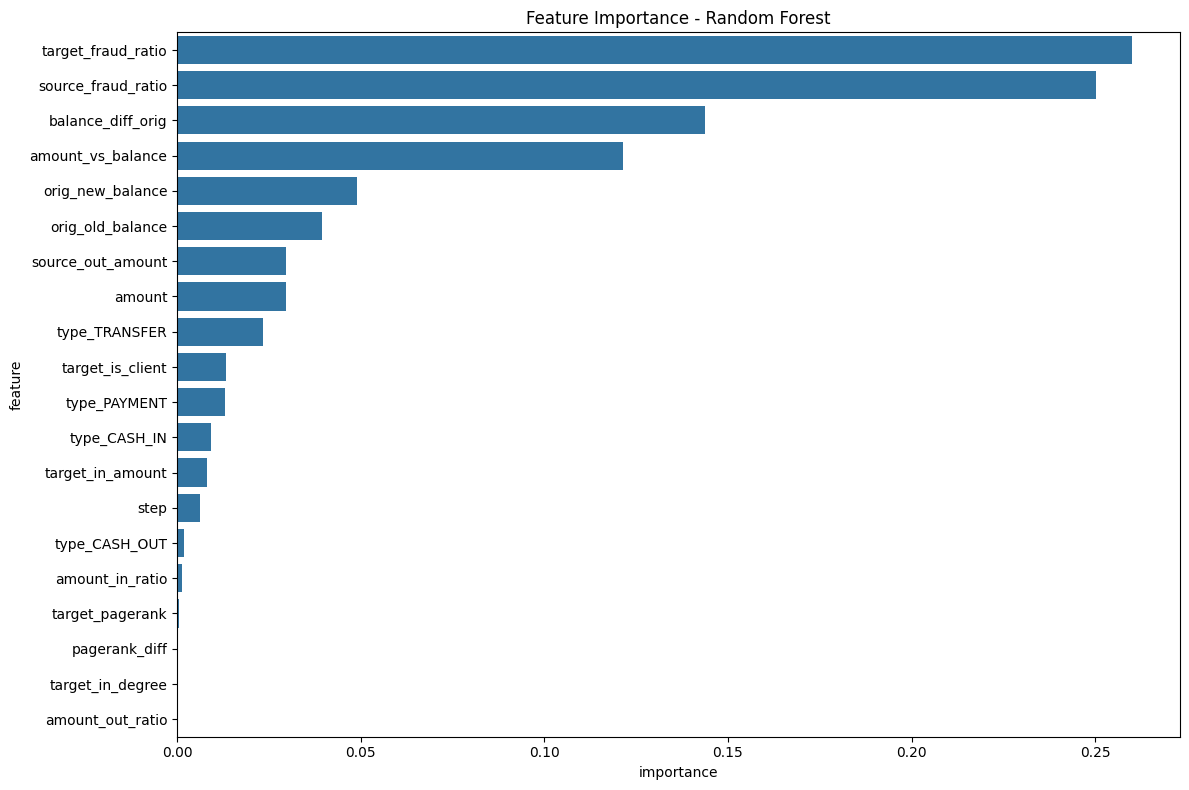


Training Gradient Boosting...
Accuracy: 1.0000
AUC-ROC: 1.0000
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     22965
        True       1.00      1.00      1.00      2053

    accuracy                           1.00     25018
   macro avg       1.00      1.00      1.00     25018
weighted avg       1.00      1.00      1.00     25018

Confusion Matrix:
[[22965     0]
 [    0  2053]]

Top 10 important features:
               feature    importance
16  source_fraud_ratio  9.994697e-01
11  same_lpa_community  3.842489e-04
17  target_fraud_ratio  1.460529e-04
18   source_out_amount  5.067169e-14
19    target_in_amount  2.320820e-15
26   balance_diff_orig  2.989075e-16
24    amount_out_ratio  0.000000e+00
2     orig_new_balance  0.000000e+00
3                 step  0.000000e+00
12   source_out_degree  0.000000e+00


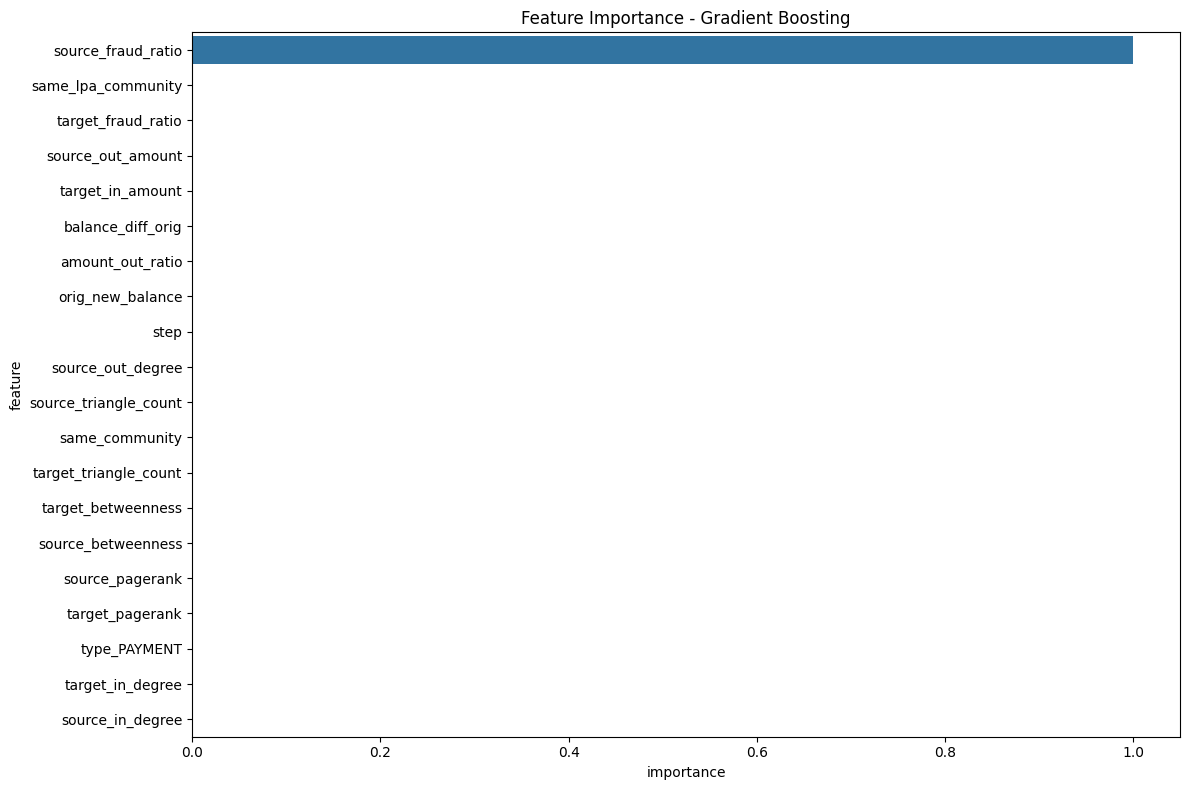

In [90]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

results = {}

for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        
        # Evaluation
        accuracy = model.score(X_test_scaled, y_test)
        auc = roc_auc_score(y_test, y_prob)
        
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC-ROC: {auc:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'auc': auc,
            'y_pred': y_pred,
            'y_prob': y_prob
        }
        
        # Feature importance (for tree-based models)
        if hasattr(model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': X.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            print("\nTop 10 important features:")
            print(feature_importance.head(10))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
            plt.title(f'Feature Importance - {name}')
            plt.tight_layout()
            plt.show()

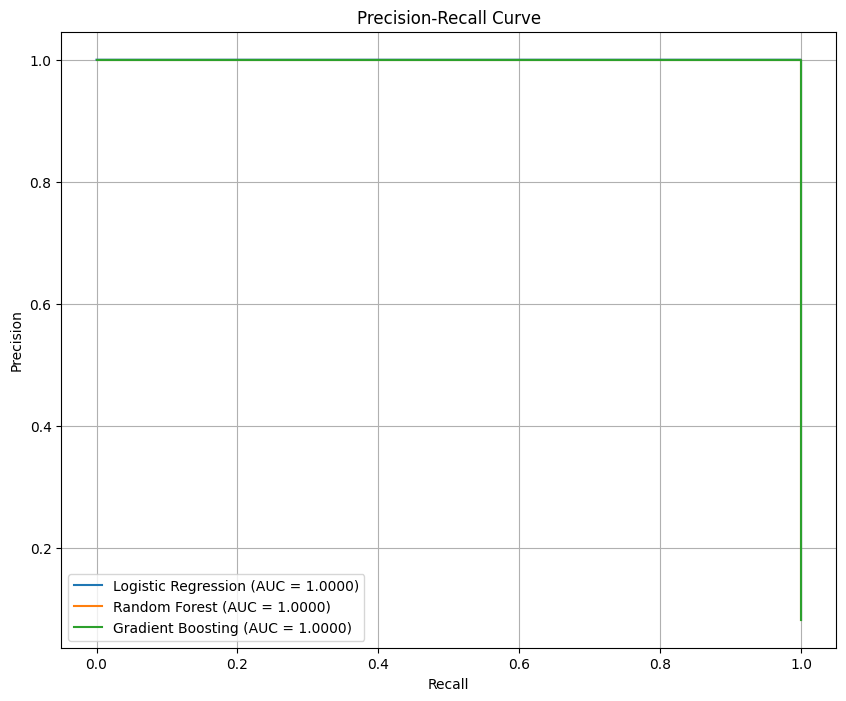

In [91]:
# Precision-Recall curve for all models
plt.figure(figsize=(10, 8))
for name, res in results.items():
    precision, recall, _ = precision_recall_curve(y_test, res['y_prob'])
    plt.plot(recall, precision, label=f'{name} (AUC = {res["auc"]:.4f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
best_model_name = max(results.items(), key=lambda x: x[1]['auc'])[0]
print(f"\nBest model: {best_model_name} with AUC = {results[best_model_name]['auc']:.4f}")


Best model: Logistic Regression with AUC = 1.0000
